[View in Colaboratory](https://colab.research.google.com/github/harekrishnamahto9872/Acadview/blob/master/Big_Mart_Sales_Analysis.ipynb)

##BIG MART SALES ANALYIS BY HAREKRISHNA MAHTO (Machine Learning Enthusiast at Acadview)

![alt text](https://content3.jdmagicbox.com/comp/kolkata/g8/pwfl1497883412u9y9g8/catalogue/big-mart-world-new-town-kolkata-grocery-stores-dghwl.jpg)

##About Big Mart

Big Mart Retail Corporation is one of the fastest growing express home delivery food and Grocery Retail Store company covering worldwide which is incorporated in the year 2016 In India.                        
     In the years of 2009 big mart started its operation through its first COCO retail store on small size 100 sft. to 300 sft. area. big mart is giving door step delivery to its customer through our retail stores 

##Aim of the project



The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

  Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


##About the Dataset



The dataset has 8524 records with 13 columns. The details of each column is given below

    Item_Identifier : Unique product ID
    Item_Weight : Weight of product
    Item_Fat_Content : Whether the product is low fat or not
    Item_Visibility : % of total display area in store allocated to this product
    Item_Type : Category to which product belongs
    Item_MRP : Maximum Retail Price (list price) of product
    Outlet_Identifier : Unique store ID
    Outlet_Establishment_Year : Year in which store was established
    Outlet_Size : Size of the store
    Outlet_Location_Type : Type of city in which store is located
    Outlet_Type : Grocery store or some sort of supermarket
    Item_Outlet_Sales : Sales of product in particular store. This is the outcome variable to be predicted.




##Importing required libraries

In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [255]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))



##Importing Dataset

In [269]:
df=pd.read_csv('Big_mart.csv')

In [273]:
df.shape

(8523, 12)

In [274]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [277]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [291]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##Cleaning Data

In [282]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##Removing NULL values from all the columns

In [285]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [287]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

##Exploratory Data Analysis

##Univariate Analysis

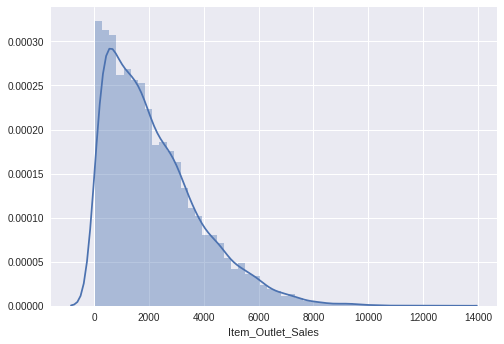

In [290]:
sns.distplot(df['Item_Outlet_Sales'])

We can see that the Outlet_sales is normally distributed with right skewness.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


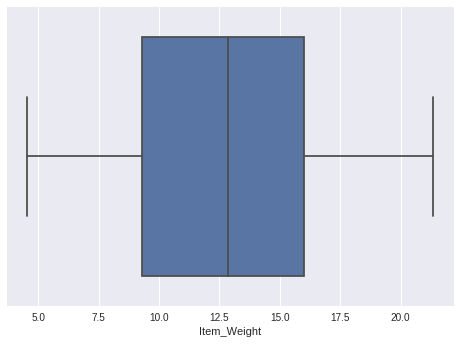

In [292]:
sns.boxplot(df['Item_Weight'])

Most of the items have weight in range of 8-16. 
The mode of weight is near to 13.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


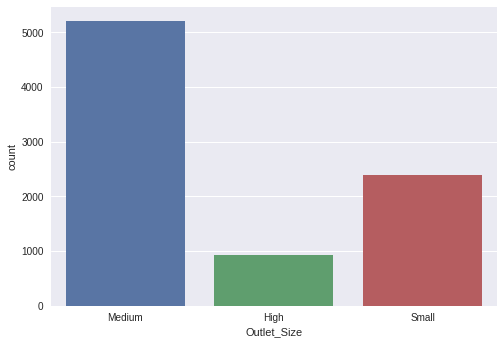

In [293]:
sns.countplot(x='Outlet_Size',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


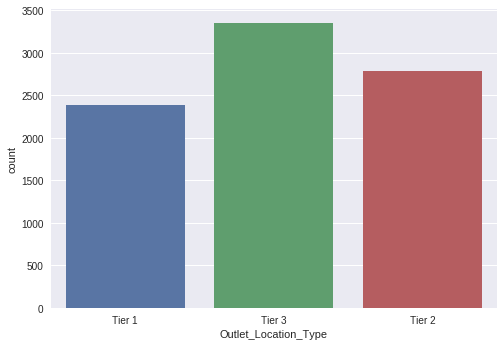

In [295]:
sns.countplot(df['Outlet_Location_Type'])

1.   Most of the Outlet are located in Tier 3.
2.   Tier 2 location is second most after Tier 3.



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


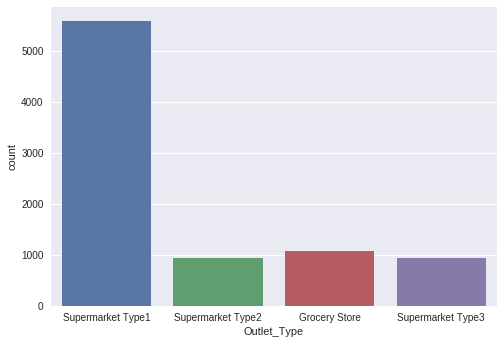

In [299]:
sns.countplot(df['Outlet_Type'])



1.   Most Outlets are Supermarkets of type 1
2.   There is Significant amount of Outlets which are Grocery store. 



##Bi-variate Analyis

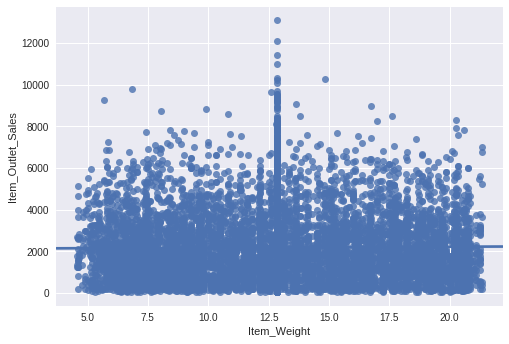

In [309]:
sns.regplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

The plot show that outlet sales has less co-relation with item weight.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


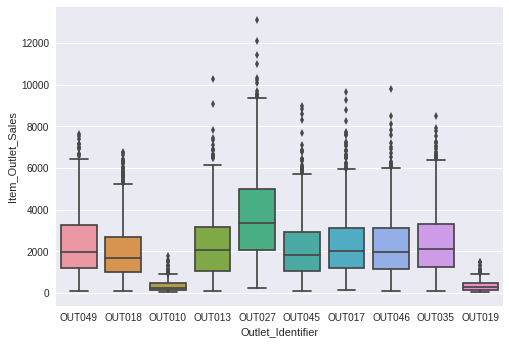

In [316]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)



1.   OUT027 has maximum outlet sales.
2.   OUT049 and OUT019 have least outlet sales among all.



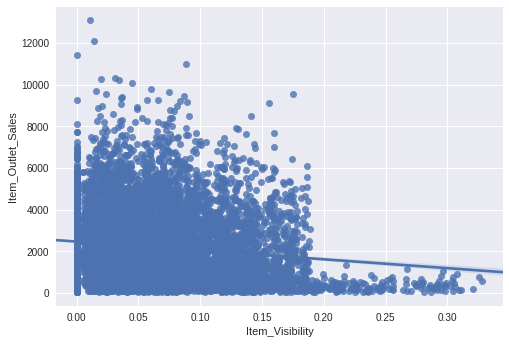

In [320]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)



1.   There is significant co-relation between Item_visibility and outlet sales.
2.   The visbility range 0.00-0.20 has maximum outlet sales.



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


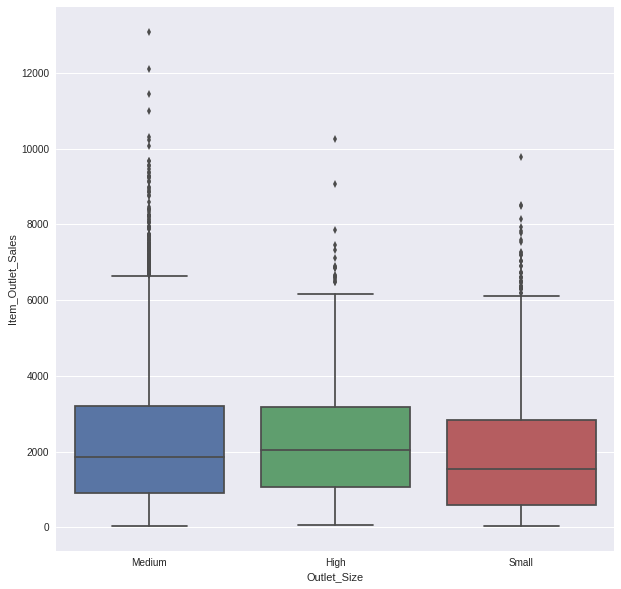

In [331]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

The plot shows the relation of Outlet size with outlet sales.

In [336]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


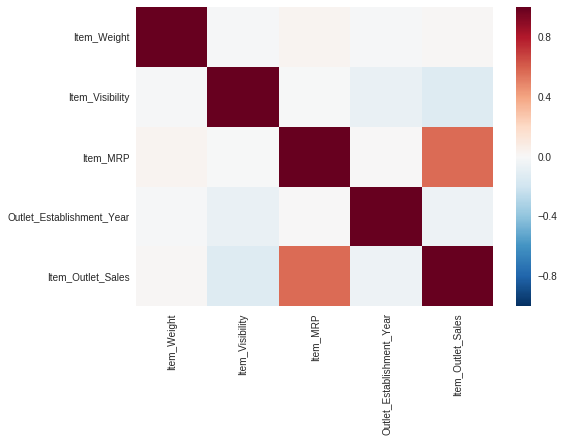

In [339]:
sns.heatmap(df.corr())

In [0]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)



1.   The plot shows that more the price of item, the better is its outlet sale.
2.   The relation is almost linear.



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


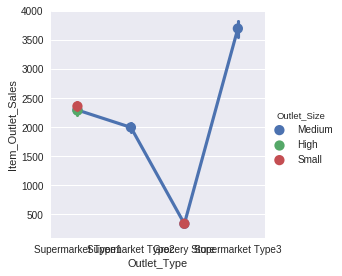

In [337]:
sns.factorplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',data=df)

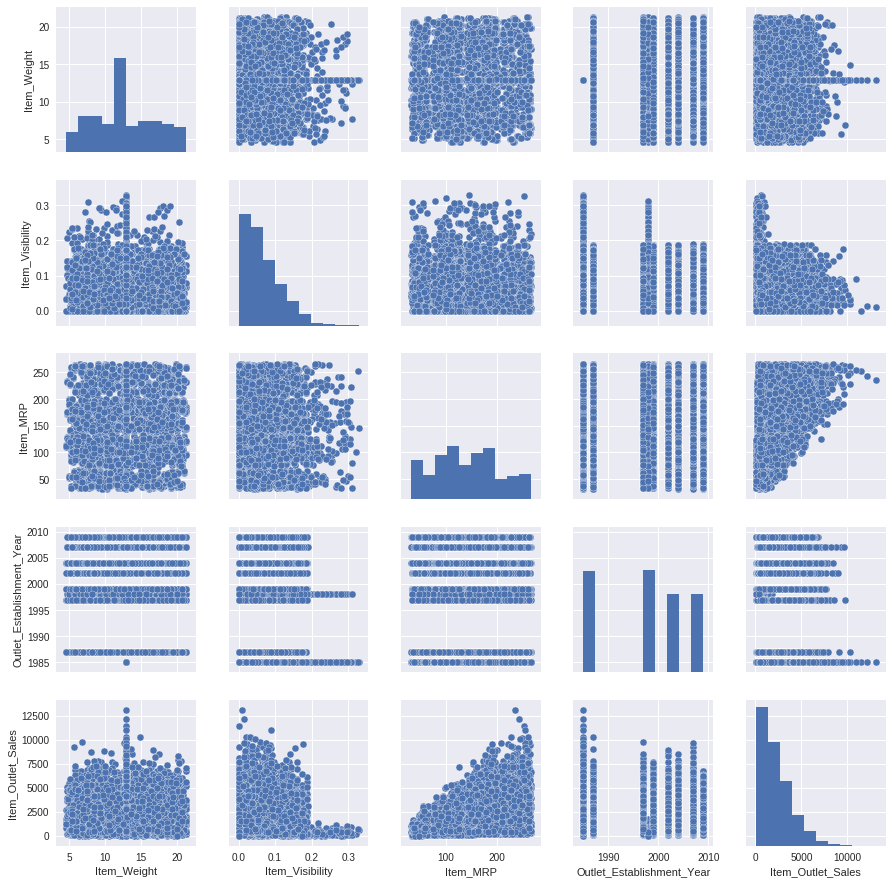

In [338]:
sns.pairplot(df)

The above plot shows all pair of relationship between all attributes

##Feature Engineeering

##Converting categorical data into numerical

In [183]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [184]:
def fun(x):
  if x=='Low Fat' or x=='LF' or x=='low fat':
    return(0)
  else:
    return(1)

In [185]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(fun)

In [186]:
df['Item_Fat_Content'].head()

0    0
1    1
2    0
3    1
4    0
Name: Item_Fat_Content, dtype: int64

In [187]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [188]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [189]:
def fun1(x):
  if x=='Medium':
    return(0)
  elif x=='High':
    return(1)
  else:
    return(2)

In [190]:
df['Outlet_Size']=df['Outlet_Size'].apply(fun1)

In [191]:
df['Outlet_Size'].head()

0    0
1    0
2    0
3    0
4    1
Name: Outlet_Size, dtype: int64

In [192]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [193]:
def fun2(x):
  if x=='Tier 1':
    return(0)
  elif x=='Tier 2':
    return(1)
  else:
    return(2)

In [194]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].apply(fun2)

In [195]:
df['Outlet_Location_Type'].head()

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int64

In [196]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [197]:
def fun3(x):
  if x=='Supermarket Type1':
    return(0)
  elif x=='Supermarket Type2':
    return(1)
  elif x=='Supermarket Type3':
    return(2)
  else:
    return(3)

In [198]:
df['Outlet_Type']=df['Outlet_Type'].apply(fun3)

In [199]:
df['Outlet_Type'].head()

0    0
1    1
2    0
3    3
4    0
Name: Outlet_Type, dtype: int64

In [200]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [201]:
df1=pd.get_dummies(df['Outlet_Identifier'])

In [204]:
df=pd.concat([df,df1],axis=1)

In [210]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'OUT010',
       'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045',
       'OUT046', 'OUT049'],
      dtype='object')

In [211]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,FDA15,9.30,0,0.016047,Dairy,249.8092,1999,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,2009,0,2,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,1999,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,1998,0,2,3,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,1987,1,2,0,...,0,1,0,0,0,0,0,0,0,0


##Feature selection

From the co-relation map we plotted before, we can see that there almost no co-relation between 'Item_Identifier', 'Item_type' and 'Outlet_Establishment_year' with our target i.e 'Item_Outlet_sales'

So we will drop these columns and will not use in training out model.

##Assigning data to X and Y variable

In [212]:
x=df.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [214]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.30,0,0.016047,249.8092,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,0,2,1,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,0,0,0,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,0,2,3,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,2,0,0,1,0,0,0,0,0,0,0,0


In [215]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

##Training Testing and splitting

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

##Linear Regression Model

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
lrm=LinearRegression()

In [220]:
lrm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [221]:
predicted=lrm.predict(x_test)

##Evaluation of Linear Regression model

In [231]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lrm.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1198973.9165274634
MEAN ABSOLUTE ERROR(MAE) 823.5576939861755
ROOT MEAN SQUARED ERROR(RMSE) 1094.9766739650042
SCORE 0.5630719364811432


##Random Forest Regressor

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
rfg=RandomForestRegressor()

In [234]:
rfg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [236]:
predicted=rfg.predict(x_test)

##Evaluation of Random Forest Regression model

In [244]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",rfg.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1358329.075441507
MEAN ABSOLUTE ERROR(MAE) 888.5816838596189
ROOT MEAN SQUARED ERROR(RMSE) 1165.4737557926849
SCORE 0.5271501531907894


##Ada Boost Regression

In [238]:
from sklearn.ensemble import AdaBoostRegressor

In [240]:
abr=AdaBoostRegressor(n_estimators=70)

In [241]:
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=70, random_state=None)

In [242]:
predicted=abr.predict(x_test)

##Evaluation of AdaBoost Regressor

In [243]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",abr.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1358329.075441507
MEAN ABSOLUTE ERROR(MAE) 888.5816838596189
ROOT MEAN SQUARED ERROR(RMSE) 1165.4737557926849
SCORE 0.5049999967698025


##Bagging Regressor

In [245]:
from sklearn.ensemble import BaggingRegressor

In [247]:
br=BaggingRegressor(n_estimators=30)

In [248]:
br.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [249]:
predicted=br.predict(x_test)

##Evaluation of Bagging Regressor

In [250]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",br.score(x_test,y_test))

MEAN SQUARED ERROR(MSE) 1222490.1320518805
MEAN ABSOLUTE ERROR(MAE) 788.8190654780058
ROOT MEAN SQUARED ERROR(RMSE) 1105.662756925402
SCORE 0.5545021966655062


##Comparing all Models and finding the best one.



1.   Linear Regression  score: 0.56
2.   Random Forest Regression  Score: 0.52
1.   AdaBoost Regression Score: 0.50
2.   Bagging Regressor  Score 0.55





We can see that Linear Regression model gave us the best score for our testing data. Therefore Linear Regression is best from all the above models.

##Summary

Firstly we studied about the dataset i.e Big Mart Sales Analysis and understood the meaning of each columns. Then we performed Exploratory Data Analysis on our dataset. We plotted various Univariate and Bi-variate plots to study the relationship between various features. Then we cleaned our data and also performed feature enginnering.                                                                                              
We trained our model and predicted values for Outlet_sales. Evaluation was done to find out the best model.

##Conclusion

From all the models that we used, we found out that Linear Regression model gave us the best score i.e 0.56. We therefore end our analysis here and conclude Linear regression as our predictive  model.